In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_html, display, Math, HTML

# Sampling

<!-- Things we don't cover, but perhaps should: 
* Sampling Bernoulli Distr.
* NOTE the initial parts of this lecture should probably come before we introduce random vectors (which is currently in Lecture 3)
--->

We will now turn to the study of __sampling distributions.__

### Population and Sample

````{margin}
```{note}
This section draws from _Understanding the New Statistics,_ Chapter 3.
```
````

A setting that comes up repeatedly is the following:
    
Imagine we have a __very__ large population of "objects."   The objects could be people, things, or just about anything.  The size of the population is so large that if we take one object out of the population, nothing about the population changes in any perceptible way.

Associated with each object is a measurement or quantity of some kind. 

So for example, we could be talking about the heights of individuals, or the costs of houses, or the weights of molecules.

<!--- paper showing house prices are lognormal or perhaps heavy-tailed: https://www.rieti.go.jp/jp/publications/dp/11e019.pdf.
 
paper showing that molecular weight distribution of polymers are lognormal https://www.sciencedirect.com/science/article/abs/pii/S001430571500021X
--->

We further imagine that we can select members of the population uniformly at random.   The selections form a __sample__, and the sample is small enough compared to the population that we do not worry about the difference between sampling with replacement and sampling without replacement.

Because sampling with replacement is easier to think about in general, we will treat all samples as if they were sampled with replacement.

<!--- https://reports.collegeboard.org/media/pdf/2022-total-group-sat-suite-of-assessments-annual-report.pdf -->

__Example.__ For example, suppose you assessing success on the SAT exam.   You would like to know the mean SAT score for students in your state.  You choose 15 people at random from students in your state who took the exam, and you determine their scores.

The $n = 15$ students are your sample, and the mean of their scores is a __sample statistic__.

__Question.__ Should you trust your sample statistic as a reflection of the "true" population mean?

There are many things that could go wrong with your strategy: 
* How do you actually choose students at random?  
* How do you find students that actually took the exam?  
* How do you find out the scores of the students who took the exam?

These are all valid concerns!

However, for now, we will focus our attention more narrowly on the relationship between the __size__ of your sample and the population.   So let's assume that somehow, your sample is really random and the scores are truly reported.

Nonetheless, the mean of your sample will probably not be equal to the mean of the population.

Let's look at the problem visually.

````{margin}
```{note}
Data on SAT Scores is [available from the College Board](https://reports.collegeboard.org/sat-suite-program-results).  We're using the mean and variance of the US national data for 2022 $(\mu = 1050, \sigma = 216)$.  The College Board report shows that the data is _roughly_ normally distributed, but for our purposes we are assuming it is _exactly_ normally distributed.
```
````

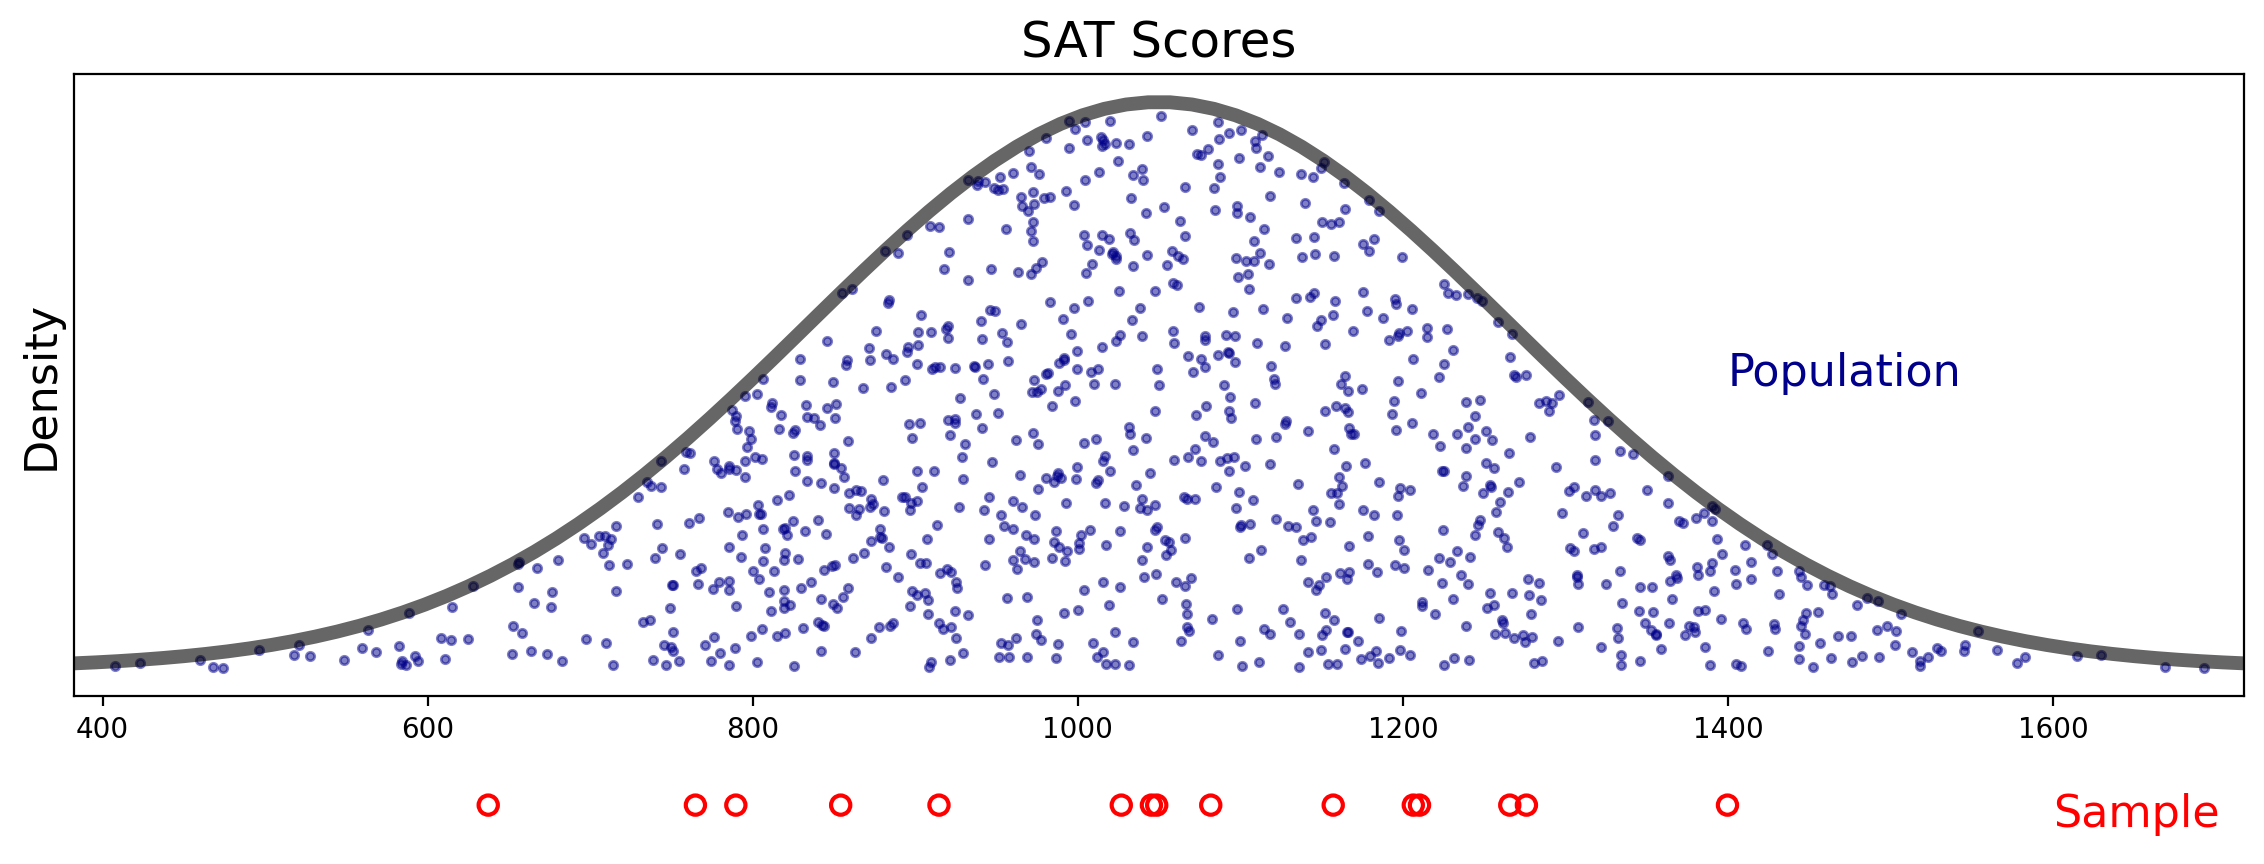

In [3]:
from scipy.stats import norm
from scipy.stats import uniform
from numpy.random import default_rng

rng = default_rng(12)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
samp_size = 15
#
# gaussian curve
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14,5), gridspec_kw={'height_ratios': [8, 1]})
x = np.linspace(norm.ppf(0.001, loc = mu, scale = sig), 
                norm.ppf(0.999, loc = mu, scale = sig), 100)
ax1.plot(x, norm.pdf(x, loc = mu, scale = sig),'k-', lw = 5, alpha = 0.6)
xmin, xmax = (x[0], x[-1])
#
# points under the curve
pop_x = norm.rvs(size = 1000, loc = mu, scale = sig)
pop_y = [uniform.rvs(size = 1, 
                     scale = norm.pdf(x_coord, loc = mu, scale = sig)) for x_coord in pop_x]
ax1.scatter(pop_x, pop_y, marker = '.', alpha = 0.5, color = 'darkblue')
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.set_ylabel('Density', size = 16)
ax1.text(1400, np.sum(ax1.get_ylim())/2, 'Population', size = 16, color = 'darkblue')
ax1.set_xlim(xmin, xmax)
#
# sample
samp_x = norm.rvs(size = samp_size, loc = mu, scale = sig, random_state = rng)
samp_y = [1 for x in samp_x]
ax2.scatter(samp_x, samp_y, 
            marker = 'o', 
            facecolors='none', 
            edgecolors='red', 
            linewidths = 1.5, s = 48)
ax2.set_xlim(xmin, xmax)
#
# ax1.set_title(f'SAT Scores 2022,  $\mu = {mu}, \sigma = {sig}$', size=14)
# 
# sample plot
# turn off y axis entirely
ax2.yaxis.set_visible(False)
# hide x axis but not its label
ax2.xaxis.set_major_locator(plt.NullLocator())
# remove the "box" around the plot
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.text(1600, np.sum(ax2.get_ylim())/2 - 0.03, 'Sample', size = 16, color = 'red')
ax1.set_title('SAT Scores', size=18);

### The Distribution of the Sample Mean

Now, let's make the assumption that the population has a normal distribution.

The population's mean is $\mu$ and its variance is $\sigma^2$.

Note: both $\mu$ and $\sigma^2$ are unknown.

When we take $n$ items from this distribution, then by the Central Limit Theorem, the sum of these items will be 
* normally distributed
* with mean $n\mu$
* and variance $n\sigma^2$.

The variances sum in this case because the items are independent -- recall that was an assumption (we chose students at random).


Let's call the sum $S$, so

$$ S = \sum_{i=1}^n X_i $$

where $X_i$ is one data point from the population.

Keep in mind that $S$ is a random variable that describes a random sample.

Then $S \sim \mathcal{N}(n\mu, n\sigma^2)$.

Now to estimate the mean of the population, we will use the mean of our sample.

Let 

$$ M = \frac{1}{n} S.$$

Now, what is the distribution of $M$?

We are simply scaling down $S$ by a constant.  So the mean of $M$ is 

$$ \overline{M} = \frac{1}{n} \overline{S} = \frac{1}{n} \cdot n\mu = \mu. $$


What about the variane of $M$?

The variance is the expectation of the square of $M - \overline{M}$.

$$  \operatorname{Var}(M) =  E[(M - \overline{M})^2] = E[(S/n - \overline{S/n})^2] = \frac{1}{n^2} E[(S - \overline{S})^2] = \frac{1}{n^2} \operatorname{Var}(S)$$

So the variance goes down by a factor of $n^2$.

$\frac{1}{n^2} \operatorname{Var}(S) = \frac{1}{n^2}n\sigma^2 = \frac{\sigma^2}{n}$, so we find that

$$ M \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right). $$

That is, the variance of the mean of the sample 
* is smaller than the variance of the population, 
* by a factor that depends on the number of data points in the sample.

Expressed in terms of standard deviations, the standard deviation of $M$ is $\sigma/\sqrt{n}$.

This is important enough that we give it a name: the standard deviation of $M$ is called the __standard error__.

The stardard error is the standard deviation of the population divided by $\sqrt{n}.$

Let's see how this works.  Here is the mean $M$ of our first sample:

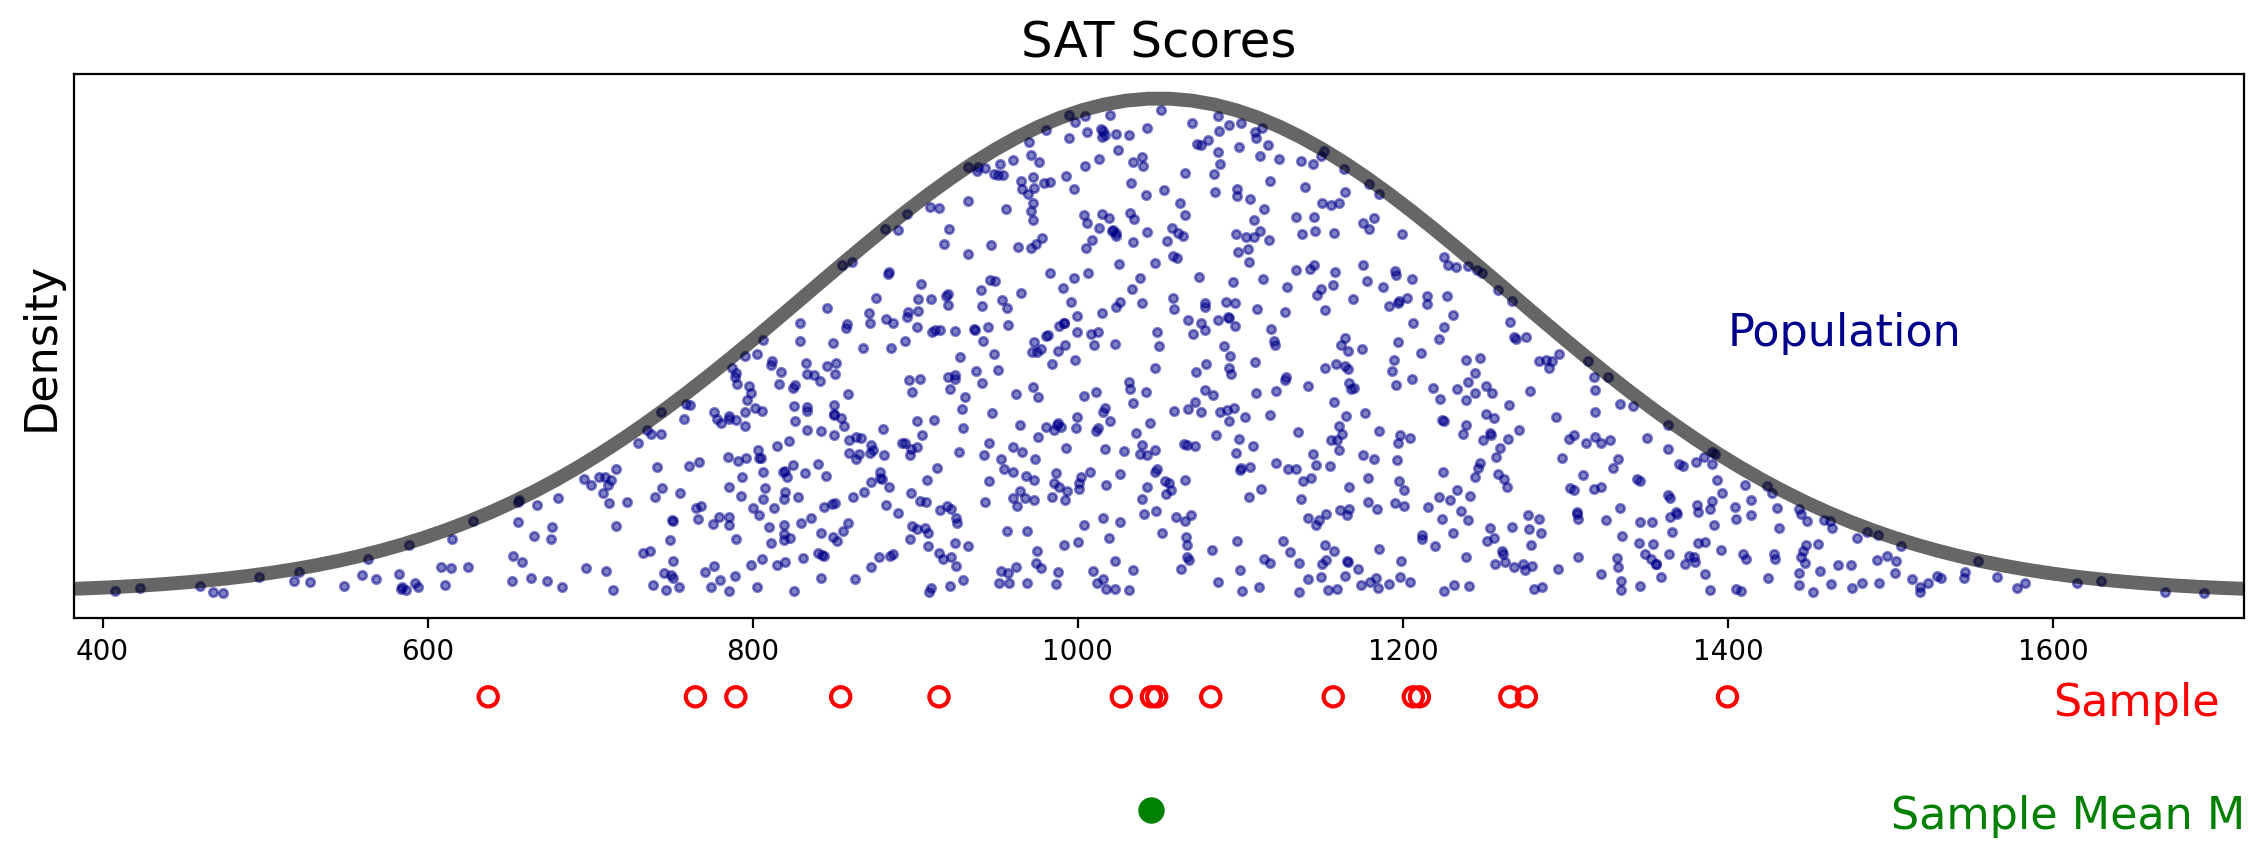

In [4]:
from scipy.stats import norm
from scipy.stats import uniform
from numpy.random import default_rng

rng = default_rng(12)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
samp_size = 15
#
# gaussian curve
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, 
                                    figsize = (14,5), 
                                    gridspec_kw={'height_ratios': [8, 1, 1]})
x = np.linspace(norm.ppf(0.001, 
                         loc = mu, 
                         scale = sig), 
                         norm.ppf(0.999, loc = mu, scale = sig), 100)
xmin, xmax = (x[0], x[-1])
ax1.plot(x, norm.pdf(x, loc = mu, scale = sig),'k-', lw = 5, alpha = 0.6)
#
# points under the curve
# use sample pop_x and pop_y as above
ax1.scatter(pop_x, pop_y, marker = '.', alpha = 0.5, color = 'darkblue')
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.set_ylabel('Density', size = 16)
ax1.text(1400, np.sum(ax1.get_ylim())/2, 'Population', size = 16, color = 'darkblue')
ax1.set_xlim(xmin, xmax)
# xmin, xmax = ax1.get_xlim()
#
# sample
# use same samp_x and samp_y as above
ax2.scatter(samp_x, samp_y, 
            marker = 'o', 
            facecolors='none', 
            edgecolors='red', 
            linewidths = 1.5, s = 48)
ax2.set_xlim(xmin, xmax)
#
# ax1.set_title(f'SAT Scores 2022,  $\mu = {mu}, \sigma = {sig}$', size=14)
# 
# sample plot
# turn off y axis entirely
ax2.yaxis.set_visible(False)
# hide x axis but not its label
ax2.xaxis.set_major_locator(plt.NullLocator())
# remove the "box" around the plot
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.text(1600, np.sum(ax2.get_ylim())/2 - 0.03, 'Sample', size = 16, color = 'red')
#
#
ax3.scatter(np.mean(samp_x), 1, 
            marker = 'o', 
            facecolors = 'g', 
            edgecolors='g', 
            linewidths = 1.5, s = 64)
ax3.set_xlim(xmin, xmax)
ax3.text(1500, np.sum(ax3.get_ylim())/2 - 0.03, 'Sample Mean M', size = 16, color = 'g')
ax3.yaxis.set_visible(False)
ax3.xaxis.set_visible(False)
# remove the "box" around the plot
for spine in ax3.spines.values():
    spine.set_visible(False)
#
ax1.set_title('SAT Scores', size=18);

Now let's repeat the procedure of taking $n = 15$ samples and computing the sample mean $M$.   We'll do this many times and show the results as a histogram.

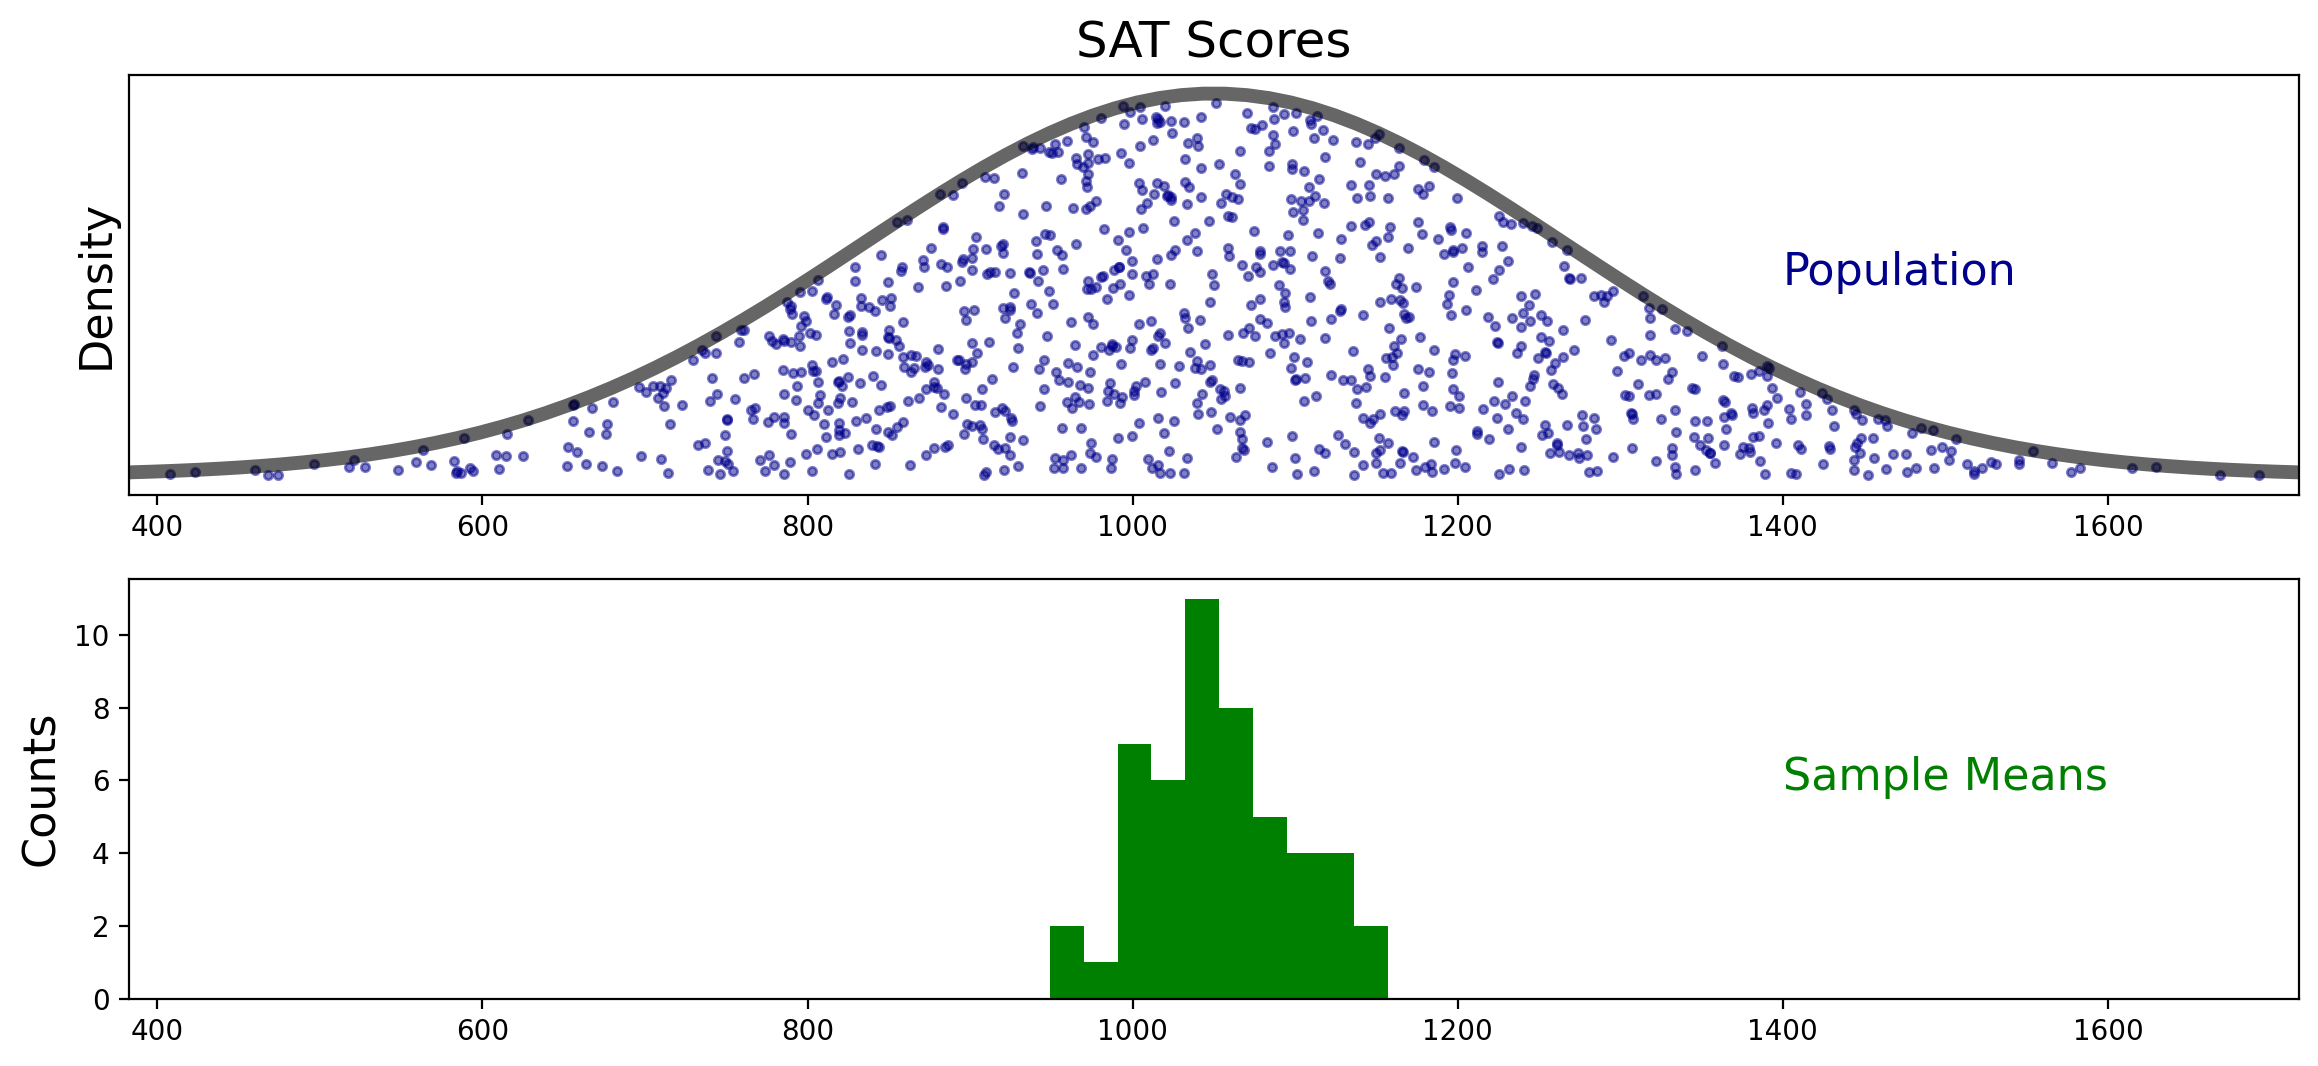

In [5]:
from scipy.stats import norm
from scipy.stats import uniform
from numpy.random import default_rng

rng = default_rng(12)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
samp_size = 15
#
# gaussian curve
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14,6), gridspec_kw={'height_ratios': [8, 8]})
x = np.linspace(norm.ppf(0.001, loc = mu, scale = sig), 
                norm.ppf(0.999, loc = mu, scale = sig), 100)
xmin, xmax = (x[0], x[-1])
ax1.plot(x, norm.pdf(x, loc = mu, scale = sig),'k-', lw = 5, alpha = 0.6)
#
# points under the curve
# use sample pop_x and pop_y as above
ax1.scatter(pop_x, pop_y, marker = '.', alpha = 0.5, color = 'darkblue')
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.set_ylabel('Density', size = 16)
ax1.text(1400, np.sum(ax1.get_ylim())/2, 'Population', size = 16, color = 'darkblue')
ax1.set_xlim(xmin, xmax)
# xmin, xmax = ax1.get_xlim()
#
# sample
n_samps = 50
samps = [np.mean(norm.rvs(size = samp_size, 
                          loc = mu, 
                          scale = sig, 
                          random_state = rng)) for i in range(n_samps)]
# use same samp_x and samp_y as above
ax2.hist(samps, color = 'g')
ax2.set_xlim(xmin, xmax)
#
# ax1.set_title(f'SAT Scores 2022,  $\mu = {mu}, \sigma = {sig}$', size=14)
# 
# sample plot
# turn off y axis entirely
# ax2.yaxis.set_visible(False)
# hide x axis but not its label
# ax2.xaxis.set_major_locator(plt.NullLocator())
# remove the "box" around the plot
#for spine in ax2.spines.values():
#    spine.set_visible(False)
ax2.text(1400, np.sum(ax2.get_ylim())/2 - 0.03, 'Sample Means', size = 16, color = 'g')
ax2.set_ylabel('Counts', size = 16)
#
ax1.set_title('SAT Scores', size=18);

This figure shows how the sampling distribution of the mean differs from the population sample.  

The sampling distribution of the mean is more concentrated around the population mean than is the population sample.

In fact, the green histogram above is showing samples from a normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$:

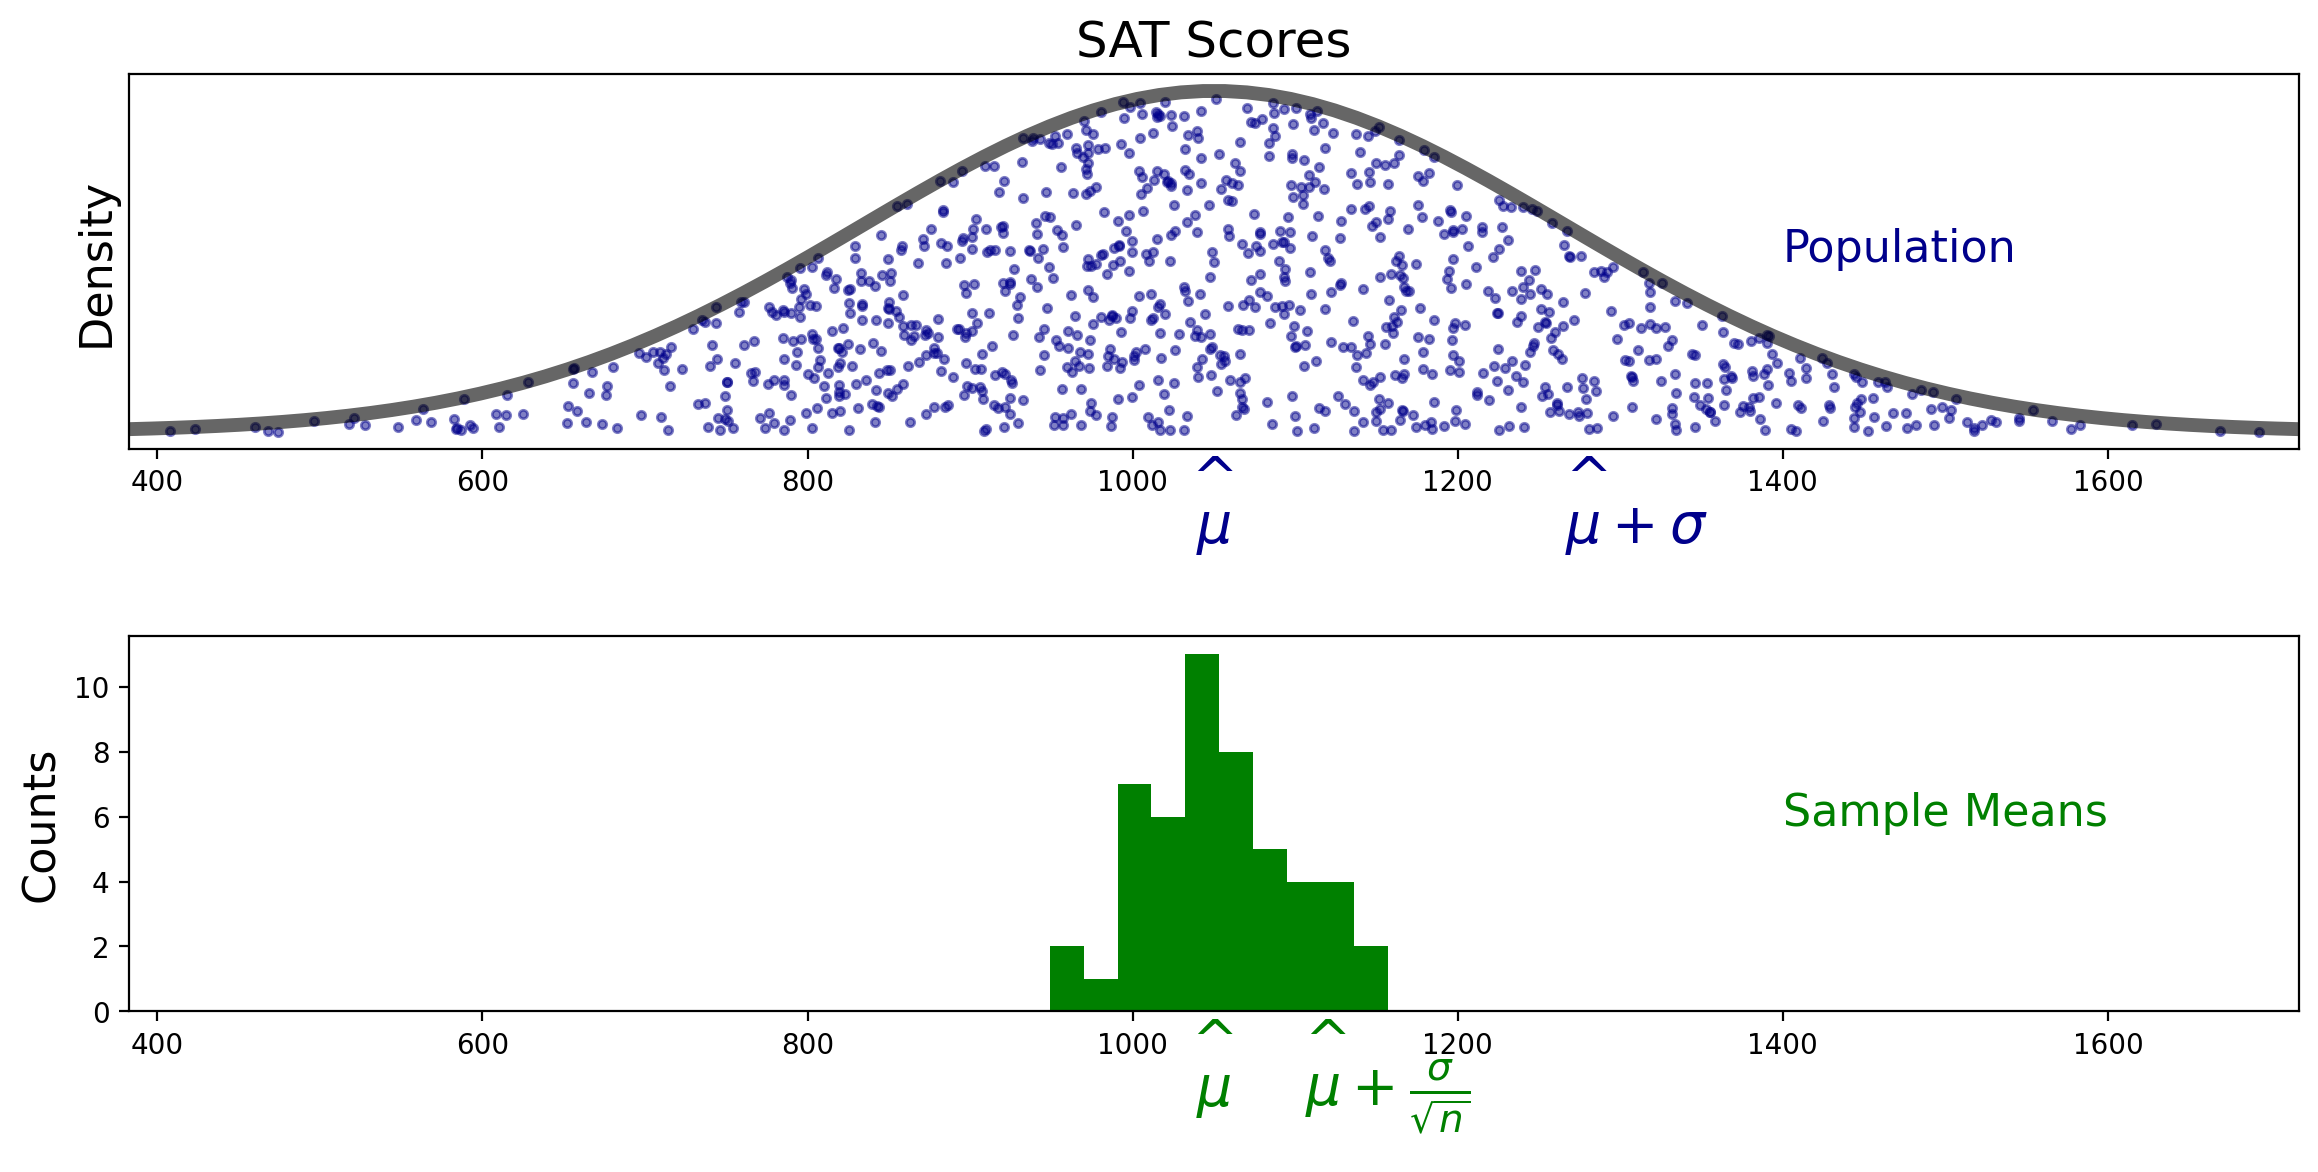

In [6]:
from scipy.stats import norm
from scipy.stats import uniform
from numpy.random import default_rng

rng = default_rng(12)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
samp_size = 15
#
# gaussian curve
fig, (ax1, ax1a, ax2, ax2a) = plt.subplots(4, 1, figsize = (14,7), 
                                           gridspec_kw={'height_ratios': [8, 2, 8, 2]})
x = np.linspace(norm.ppf(0.001, loc = mu, scale = sig), 
                norm.ppf(0.999, loc = mu, scale = sig), 100)
xmin, xmax = (x[0], x[-1])
ax1.plot(x, norm.pdf(x, loc = mu, scale = sig),'k-', lw = 5, alpha = 0.6)
#
# points under the curve
# use sample pop_x and pop_y as above
ax1.scatter(pop_x, pop_y, marker = '.', alpha = 0.5, color = 'darkblue')
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.set_ylabel('Density', size = 16)
ax1.text(1400, np.sum(ax1.get_ylim())/2, 'Population', size = 16, color = 'darkblue')
ax1.set_xlim(xmin, xmax)
# xmin, xmax = ax1.get_xlim()
#
# sample
n_samps = 50
samps = [np.mean(norm.rvs(size = samp_size, 
                          loc = mu, 
                          scale = sig, 
                          random_state = rng)) for i in range(n_samps)]
# use same samp_x and samp_y as above
ax2.hist(samps, color = 'g')
ax2.set_xlim(xmin, xmax)
#
# ax1.set_title(f'SAT Scores 2022,  $\mu = {mu}, \sigma = {sig}$', size=14)
# 
# sample plot
# turn off y axis entirely
# ax2.yaxis.set_visible(False)
# hide x axis but not its label
# ax2.xaxis.set_major_locator(plt.NullLocator())
# remove the "box" around the plot
#for spine in ax2.spines.values():
#    spine.set_visible(False)
ax2.text(1400, np.sum(ax2.get_ylim())/2 - 0.03, 'Sample Means', size = 16, color = 'g')
ax2.set_ylabel('Counts', size = 16)
#
ax1a.text(mu, np.sum(ax1a.get_ylim())/2, '$\mu$', size = 20, color = 'darkblue', ha = 'center')
ax1a.text(mu+sig, np.sum(ax1a.get_ylim())/2, '$\mu+\sigma$', 
          size = 20, color = 'darkblue', ha = 'left')
ax1a.text(mu, ax1a.get_ylim()[1], '^', size = 20, 
          color = 'darkblue', ha = 'center')
ax1a.text(mu+sig, ax1a.get_ylim()[1], '^', size = 20, color = 'darkblue', ha = 'left')
ax1a.yaxis.set_visible(False)
ax1a.xaxis.set_visible(False)
for spine in ax1a.spines.values():
    spine.set_visible(False)
ax1a.set_xlim(xmin, xmax)
#
ax2a.text(mu, np.sum(ax2a.get_ylim())/2, '$\mu$', size = 20, color = 'g', ha = 'center')
ax2a.text(mu+(sig/np.sqrt(samp_size)), np.sum(ax2a.get_ylim())/2, 
          r'$\mu+\frac{\sigma}{\sqrt{n}}$', size = 20, color = 'g', ha = 'left')
ax2a.text(mu, ax2a.get_ylim()[1], '^', size = 20, color = 'g', ha = 'center')
ax2a.text(mu+(sig/np.sqrt(samp_size)), ax2a.get_ylim()[1], '^', 
          size = 20, color = 'g', ha = 'left')
ax2a.yaxis.set_visible(False)
ax2a.xaxis.set_visible(False)
for spine in ax2a.spines.values():
    spine.set_visible(False)
ax2a.set_xlim(xmin, xmax)
#
ax1.set_title('SAT Scores', size=18);

### Effect of Sample Size

Now, the previous results showed how the sample mean $M$ relates to the population, when $M$ is the average of $n = 15$ data points.

What would happen if we had taken more data points in computing $M$?

Intuitively, taking more data points would cause $M$ to be a "better" estimate of the true mean $\mu$.

We can see that in practice.   Here is the histogram we get if we used 100 data points each time we compute $M$:

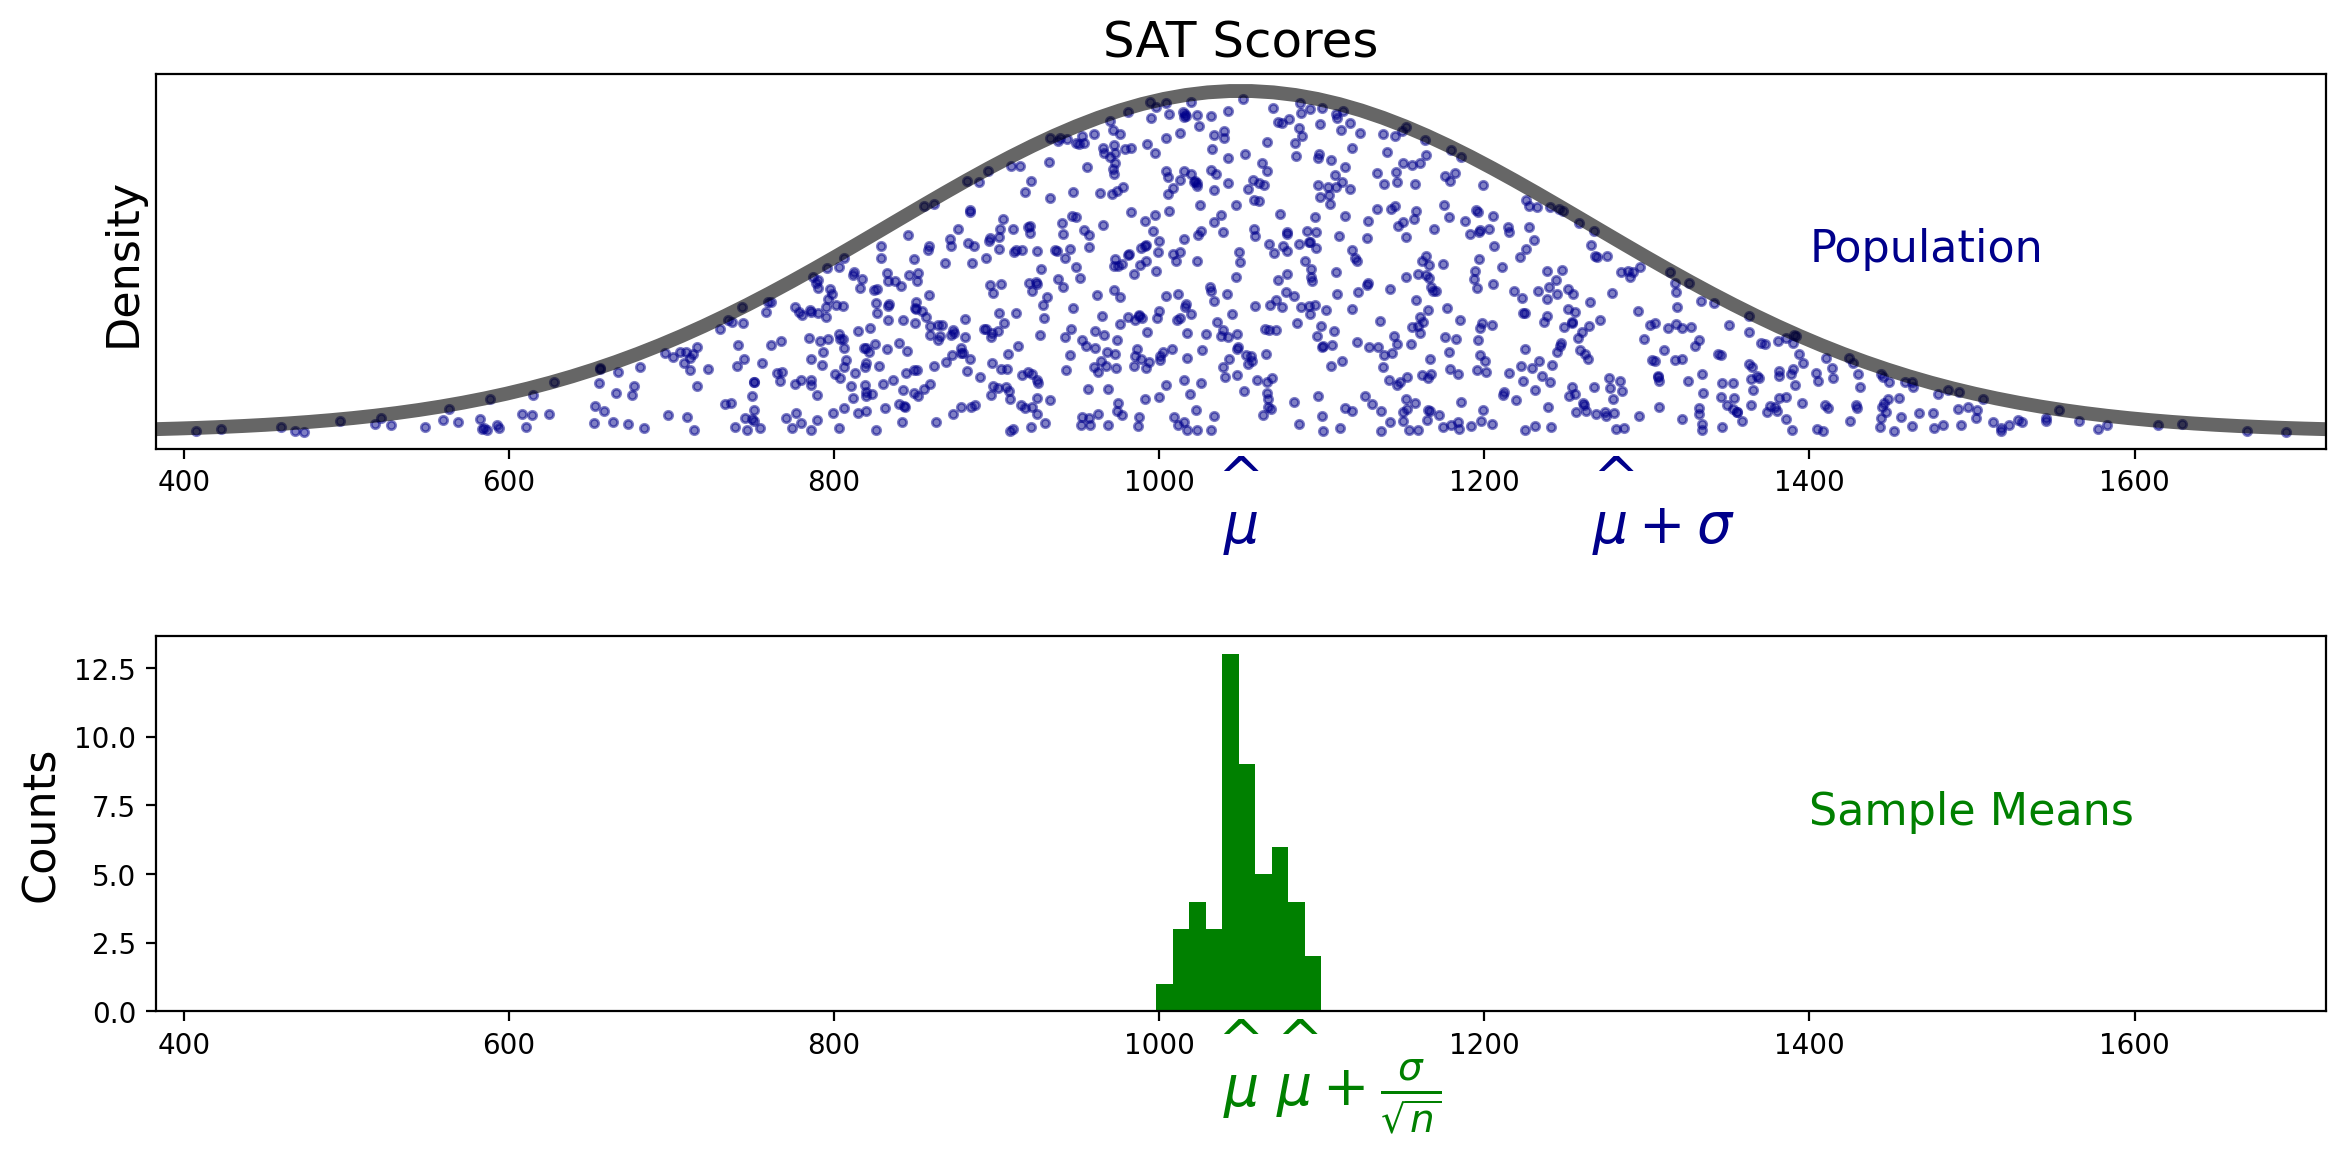

In [7]:
from scipy.stats import norm
from scipy.stats import uniform
from numpy.random import default_rng

rng = default_rng(12)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
samp_size = 100
#
# gaussian curve
fig, (ax1, ax1a, ax2, ax2a) = plt.subplots(4, 1, figsize = (14,7), 
                                           gridspec_kw={'height_ratios': [8, 2, 8, 2]})
x = np.linspace(norm.ppf(0.001, loc = mu, scale = sig), 
                norm.ppf(0.999, loc = mu, scale = sig), 100)
xmin, xmax = (x[0], x[-1])
ax1.plot(x, norm.pdf(x, loc = mu, scale = sig),'k-', lw = 5, alpha = 0.6)
#
# points under the curve
# use sample pop_x and pop_y as above
ax1.scatter(pop_x, pop_y, marker = '.', alpha = 0.5, color = 'darkblue')
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.set_ylabel('Density', size = 16)
ax1.text(1400, np.sum(ax1.get_ylim())/2, 'Population', size = 16, color = 'darkblue')
ax1.set_xlim(xmin, xmax)
# xmin, xmax = ax1.get_xlim()
#
# sample
n_samps = 50
samps = [np.mean(norm.rvs(size = samp_size, loc = mu, 
                          scale = sig, random_state = rng)) for i in range(n_samps)]
# use same samp_x and samp_y as above
ax2.hist(samps, color = 'g')
ax2.set_xlim(xmin, xmax)
#
# ax1.set_title(f'SAT Scores 2022,  $\mu = {mu}, \sigma = {sig}$', size=14)
# 
# sample plot
# turn off y axis entirely
# ax2.yaxis.set_visible(False)
# hide x axis but not its label
# ax2.xaxis.set_major_locator(plt.NullLocator())
# remove the "box" around the plot
#for spine in ax2.spines.values():
#    spine.set_visible(False)
ax2.text(1400, np.sum(ax2.get_ylim())/2 - 0.03, 'Sample Means', size = 16, color = 'g')
ax2.set_ylabel('Counts', size = 16)
#
ax1a.text(mu, np.sum(ax1a.get_ylim())/2, '$\mu$', size = 20, 
          color = 'darkblue', ha = 'center')
ax1a.text(mu+sig, np.sum(ax1a.get_ylim())/2, '$\mu+\sigma$', size = 20, 
          color = 'darkblue', ha = 'left')
ax1a.text(mu, ax1a.get_ylim()[1], '^', size = 20, color = 'darkblue', ha = 'center')
ax1a.text(mu+sig, ax1a.get_ylim()[1], '^', size = 20, color = 'darkblue', ha = 'left')
ax1a.yaxis.set_visible(False)
ax1a.xaxis.set_visible(False)
for spine in ax1a.spines.values():
    spine.set_visible(False)
ax1a.set_xlim(xmin, xmax)
#
ax2a.text(mu, np.sum(ax2a.get_ylim())/2, '$\mu$', size = 20, color = 'g', ha = 'center')
ax2a.text(mu+(sig/np.sqrt(samp_size)), np.sum(ax2a.get_ylim())/2, 
          r'$\mu+\frac{\sigma}{\sqrt{n}}$', size = 20, color = 'g', ha = 'left')
ax2a.text(mu, ax2a.get_ylim()[1], '^', size = 20, color = 'g', ha = 'center')
ax2a.text(mu+(sig/np.sqrt(samp_size)), ax2a.get_ylim()[1], '^', size = 20, 
          color = 'g', ha = 'left')
ax2a.yaxis.set_visible(False)
ax2a.xaxis.set_visible(False)
for spine in ax2a.spines.values():
    spine.set_visible(False)
ax2a.set_xlim(xmin, xmax)
#
ax1.set_title('SAT Scores', size=18);

Now, the distribution of $M$ is even more concentrated around the true mean $\mu$.  

We can be precise about this change:  the standard error went from $\frac{\sigma}{\sqrt{15}}$ to $\frac{\sigma}{\sqrt{100}}$.

We will return to this effect in the next lecture, where we will take up the important topic of _confidence intervals._